# Real or Not? NLP with Disaster Tweets

Соревнование для знакомства с NLP.

Задача бинарной классификации. Необходимо проанализировать твиты и сделать выводы о том, в каких из них речь идет о реальных бедствиях, а где нет.

In [27]:
import seaborn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import feature_extraction, linear_model, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold

%matplotlib inline

### Загружаем данные для анализа

In [11]:
train_data = pd.read_csv("data/train.csv", index_col="id")
test_data = pd.read_csv("data/test.csv", index_col="id")
print(f"Shape of train data: {train_data.shape}. Shape of test data: {test_data.shape}")
train_data.head()

Shape of train data: (7613, 4). Shape of test data: (3263, 3)


,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 4 columns):
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(1), object(3)
memory usage: 297.4+ KB


### Анализируем целевую переменную

In [13]:
train_data['target'].describe()

count    7613.00000
mean        0.42966
std         0.49506
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: target, dtype: float64

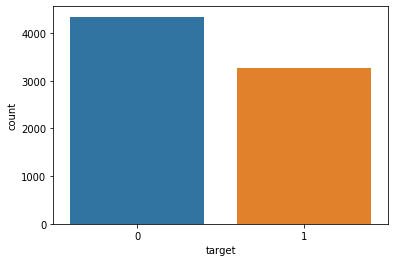

In [14]:
seaborn.countplot(x='target', data=train_data)

Вывод: классы неплохо сбалансированы

### Пропуски в данных

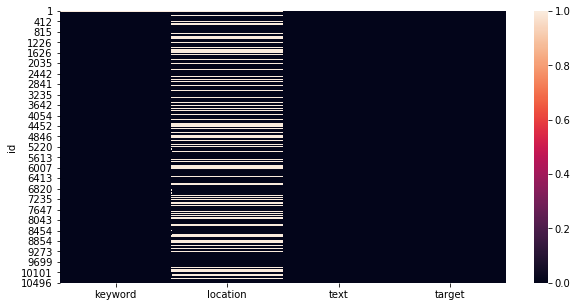

In [15]:
plt.figure(figsize=(10,5))
seaborn.heatmap(train_data.isnull());

### Количество уникальных значений

In [16]:
train_data.nunique()

keyword      221
location    3341
text        7503
target         2
dtype: int64

### Признак "Ключевое слово"

In [23]:
train_data['keyword'].unique()[:20]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze'],
      dtype=object)

### Признак "Локация"

In [24]:
train_data['location'].unique()[:20]

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', 'AFRICA',
       'Philadelphia, PA', 'London, UK', 'Pretoria', 'World Wide!!',
       'Paranaque City', 'Live On Webcam', 'milky way',
       'GREENSBORO,NORTH CAROLINA', 'England.',
       'Sheffield Township, Ohio', 'India', 'Barbados', 'Anaheim',
       'Abuja', 'USA', 'South Africa'], dtype=object)

## Векторизация документов (извлечение фич)

In [29]:
count_vectorizer = feature_extraction.text.CountVectorizer()

train_vectors = count_vectorizer.fit_transform(train_data["text"])
test_vectors = count_vectorizer.transform(test_data["text"])

### Разделяем выборку на трейн и тест

In [30]:
X = train_vectors
y = train_data['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Определим кроссвалидационную стратегию

In [32]:
seed = 3
scoring = 'f1'
n_folds = 7

def f1_cv(model):
    kfold = KFold(n_splits=n_folds, random_state=seed)
    return cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)

### Модель

In [33]:
clf = linear_model.RidgeClassifier()

In [35]:
f1_cv(clf).mean()

0.7258566442223086

In [36]:
clf.fit(X, y)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [37]:
test_data['target'] = clf.predict(test_vectors)

In [38]:
test_data["target"].to_csv('ridge.csv', header=True)